In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(3000/necoc)
generations

12

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

116


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/250".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/250
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49982 stdev: 0.05506
Best fitness: 0.66419 - size: (2, 13) - species 1 - id 13
Average adjusted fitness: 0.137
Mean genetic distance 2.907, standard deviation 0.498
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 14.078 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53245 stdev: 0.05415
Best fitness: 0.66852 - size: (2, 14) - species 6 - id 287
Average adjusted fitness: 0.137
Mean genetic distance 2.914, standard deviation 0.462
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 12.704 sec (13.391 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53870 stdev: 0.05991
Best fitness: 0.68707 - size: (2, 14) - species 8 - id 460
Average adjusted fitness: 0.154
Mean genetic distance 2.948, standard deviation 0.475
Population of 197 members in 26 species


 ****** Running generation 0 ****** 

Population's average fitness: 0.49663 stdev: 0.05234
Best fitness: 0.64378 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.169
Mean genetic distance 2.792, standard deviation 0.460
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 18.192 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52717 stdev: 0.05939
Best fitness: 0.71119 - size: (3, 15) - species 14 - id 325
Average adjusted fitness: 0.167
Mean genetic distance 2.886, standard deviation 0.470
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 19.386 sec (18.789 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53819 stdev: 0.06212
Best fitness: 0.71119 - size: (3, 15) - species 14 - id 325
Average adjusted fitness: 0.174
Mean genetic distance 2.907, standard deviation 0.483
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 19.426 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50134 stdev: 0.07700
Best fitness: 0.72851 - size: (2, 13) - species 2 - id 197
Average adjusted fitness: 0.209
Mean genetic distance 2.896, standard deviation 0.471
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 25.160 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53803 stdev: 0.07818
Best fitness: 0.73902 - size: (3, 15) - species 6 - id 339
Average adjusted fitness: 0.204
Mean genetic distance 2.989, standard deviation 0.468
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 26.769 sec (25.964 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56295 stdev: 0.08642
Best fitness: 0.79592 - size: (4, 16) - species 10 - id 482
Average adjusted fitness: 0.229
Mean genetic distance 2.997, standard deviation 0.478
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 23.688 sec (25.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47122 stdev: 0.08860
Best fitness: 0.69017 - size: (2, 13) - species 4 - id 92
Average adjusted fitness: 0.147
Mean genetic distance 2.882, standard deviation 0.491
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 17.955 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52570 stdev: 0.09428
Best fitness: 0.70625 - size: (2, 14) - species 2 - id 322
Average adjusted fitness: 0.197
Mean genetic distance 3.039, standard deviation 0.509
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.100 sec (18.528 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54047 stdev: 0.09049
Best fitness: 0.70625 - size: (2, 14) - species 4 - id 322
Average adjusted fitness: 0.236
Mean genetic distance 3.095, standard deviation 0.488
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 20.497 sec (19.18


 ****** Running generation 0 ****** 

Population's average fitness: 0.49726 stdev: 0.06590
Best fitness: 0.69450 - size: (2, 13) - species 2 - id 84
Average adjusted fitness: 0.235
Mean genetic distance 3.000, standard deviation 0.510
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 18.039 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54080 stdev: 0.08037
Best fitness: 0.75943 - size: (3, 14) - species 24 - id 385
Average adjusted fitness: 0.241
Mean genetic distance 3.039, standard deviation 0.512
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 19.171 sec (18.605 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56774 stdev: 0.09176
Best fitness: 0.76500 - size: (3, 15) - species 5 - id 429
Average adjusted fitness: 0.263
Mean genetic distance 3.070, standard deviation 0.504
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 20.309 sec (19.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.46417 stdev: 0.15565
Best fitness: 0.77118 - size: (2, 13) - species 1 - id 46
Average adjusted fitness: 0.252
Mean genetic distance 2.846, standard deviation 0.483
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.926 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54588 stdev: 0.15206
Best fitness: 0.78046 - size: (3, 14) - species 1 - id 356
Average adjusted fitness: 0.295
Mean genetic distance 3.018, standard deviation 0.472
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 19.004 sec (18.465 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61215 stdev: 0.13088
Best fitness: 0.78046 - size: (3, 14) - species 1 - id 356
Average adjusted fitness: 0.367
Mean genetic distance 3.099, standard deviation 0.474
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.018 sec (18.98


 ****** Running generation 0 ****** 

Population's average fitness: 0.50049 stdev: 0.06883
Best fitness: 0.68769 - size: (2, 13) - species 3 - id 77
Average adjusted fitness: 0.262
Mean genetic distance 2.894, standard deviation 0.489
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 18.592 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53325 stdev: 0.07123
Best fitness: 0.70625 - size: (3, 15) - species 21 - id 354
Average adjusted fitness: 0.238
Mean genetic distance 3.001, standard deviation 0.475
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 19.503 sec (19.048 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54510 stdev: 0.07438
Best fitness: 0.73840 - size: (3, 13) - species 17 - id 504
Average adjusted fitness: 0.182
Mean genetic distance 3.050, standard deviation 0.492
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 20.563 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51886 stdev: 0.09085
Best fitness: 0.74459 - size: (2, 13) - species 2 - id 159
Average adjusted fitness: 0.215
Mean genetic distance 2.963, standard deviation 0.470
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 17.996 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56312 stdev: 0.08829
Best fitness: 0.74459 - size: (2, 13) - species 2 - id 159
Average adjusted fitness: 0.222
Mean genetic distance 3.059, standard deviation 0.478
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 19.557 sec (18.777 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58183 stdev: 0.09590
Best fitness: 0.78973 - size: (3, 15) - species 18 - id 491
Average adjusted fitness: 0.229
Mean genetic distance 3.116, standard deviation 0.469
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 20.315 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.44822 stdev: 0.14463
Best fitness: 0.74088 - size: (2, 13) - species 1 - id 30
Average adjusted fitness: 0.186
Mean genetic distance 2.909, standard deviation 0.456
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.057 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56475 stdev: 0.14392
Best fitness: 0.77984 - size: (2, 14) - species 4 - id 249
Average adjusted fitness: 0.326
Mean genetic distance 3.033, standard deviation 0.462
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 19.234 sec (18.645 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62629 stdev: 0.12143
Best fitness: 0.81138 - size: (4, 17) - species 35 - id 535
Average adjusted fitness: 0.343
Mean genetic distance 3.080, standard deviation 0.471
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 20.064 sec (19.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.50035 stdev: 0.04896
Best fitness: 0.63327 - size: (2, 13) - species 5 - id 80
Average adjusted fitness: 0.184
Mean genetic distance 2.966, standard deviation 0.511
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.770 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52660 stdev: 0.05317
Best fitness: 0.67038 - size: (2, 13) - species 5 - id 378
Average adjusted fitness: 0.155
Mean genetic distance 3.054, standard deviation 0.523
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.263 sec (19.017 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54407 stdev: 0.05643
Best fitness: 0.69450 - size: (4, 17) - species 25 - id 443
Average adjusted fitness: 0.159
Mean genetic distance 3.036, standard deviation 0.503
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 19.968 sec (19.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.42565 stdev: 0.20660
Best fitness: 0.81200 - size: (2, 13) - species 1 - id 142
Average adjusted fitness: 0.218
Mean genetic distance 2.940, standard deviation 0.479
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.208 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60786 stdev: 0.20740
Best fitness: 0.82746 - size: (3, 15) - species 7 - id 252
Average adjusted fitness: 0.451
Mean genetic distance 3.100, standard deviation 0.458
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 19.651 sec (18.930 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67246 stdev: 0.18059
Best fitness: 0.82746 - size: (3, 14) - species 17 - id 475
Average adjusted fitness: 0.464
Mean genetic distance 3.117, standard deviation 0.449
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 21.246 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.44361 stdev: 0.13687
Best fitness: 0.70006 - size: (2, 13) - species 2 - id 80
Average adjusted fitness: 0.191
Mean genetic distance 2.917, standard deviation 0.502
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 18.348 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55270 stdev: 0.14333
Best fitness: 0.72789 - size: (3, 15) - species 4 - id 261
Average adjusted fitness: 0.279
Mean genetic distance 3.023, standard deviation 0.481
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 19.401 sec (18.874 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58379 stdev: 0.13990
Best fitness: 0.78479 - size: (4, 16) - species 20 - id 443
Average adjusted fitness: 0.296
Mean genetic distance 3.035, standard deviation 0.479
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 20.382 sec (19.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.56861 stdev: 0.21462
Best fitness: 0.86766 - size: (2, 13) - species 3 - id 195
Average adjusted fitness: 0.368
Mean genetic distance 2.866, standard deviation 0.451
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 18.556 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.66967 stdev: 0.18727
Best fitness: 0.87941 - size: (3, 13) - species 8 - id 326
Average adjusted fitness: 0.469
Mean genetic distance 2.947, standard deviation 0.494
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 19.318 sec (18.937 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72003 stdev: 0.16417
Best fitness: 0.87941 - size: (3, 13) - species 8 - id 326
Average adjusted fitness: 0.535
Mean genetic distance 3.006, standard deviation 0.479
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.457 sec (19.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.50778 stdev: 0.08786
Best fitness: 0.69944 - size: (2, 13) - species 5 - id 137
Average adjusted fitness: 0.202
Mean genetic distance 2.860, standard deviation 0.462
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.390 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56158 stdev: 0.08325
Best fitness: 0.74273 - size: (3, 14) - species 6 - id 360
Average adjusted fitness: 0.214
Mean genetic distance 2.969, standard deviation 0.475
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 19.423 sec (18.907 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57246 stdev: 0.08316
Best fitness: 0.74273 - size: (3, 14) - species 8 - id 360
Average adjusted fitness: 0.226
Mean genetic distance 3.034, standard deviation 0.502
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.456 sec (19.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.48465 stdev: 0.14639
Best fitness: 0.78108 - size: (2, 13) - species 3 - id 90
Average adjusted fitness: 0.246
Mean genetic distance 2.881, standard deviation 0.495
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 18.412 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57264 stdev: 0.14990
Best fitness: 0.78108 - size: (2, 13) - species 3 - id 90
Average adjusted fitness: 0.322
Mean genetic distance 2.967, standard deviation 0.494
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.504 sec (19.458 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58726 stdev: 0.15083
Best fitness: 0.78602 - size: (3, 13) - species 11 - id 466
Average adjusted fitness: 0.335
Mean genetic distance 2.992, standard deviation 0.457
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 20.189 sec (19.70


 ****** Running generation 0 ****** 

Population's average fitness: 0.50889 stdev: 0.07320
Best fitness: 0.72913 - size: (2, 13) - species 1 - id 124
Average adjusted fitness: 0.253
Mean genetic distance 2.853, standard deviation 0.455
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 18.317 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54698 stdev: 0.08029
Best fitness: 0.75448 - size: (2, 14) - species 3 - id 311
Average adjusted fitness: 0.222
Mean genetic distance 2.954, standard deviation 0.472
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.718 sec (19.018 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55709 stdev: 0.09393
Best fitness: 0.75819 - size: (3, 16) - species 9 - id 445
Average adjusted fitness: 0.306
Mean genetic distance 2.988, standard deviation 0.483
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.708 sec (19.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.48418 stdev: 0.08486
Best fitness: 0.66234 - size: (2, 13) - species 3 - id 81
Average adjusted fitness: 0.164
Mean genetic distance 2.913, standard deviation 0.496
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 19.173 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53654 stdev: 0.08754
Best fitness: 0.72171 - size: (3, 15) - species 4 - id 269
Average adjusted fitness: 0.188
Mean genetic distance 3.047, standard deviation 0.501
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 20.087 sec (19.630 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54457 stdev: 0.08887
Best fitness: 0.72171 - size: (3, 15) - species 4 - id 269
Average adjusted fitness: 0.222
Mean genetic distance 3.090, standard deviation 0.506
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 20.137 sec (19.79


 ****** Running generation 0 ****** 

Population's average fitness: 0.50618 stdev: 0.05502
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 147
Average adjusted fitness: 0.184
Mean genetic distance 2.908, standard deviation 0.492
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 19.065 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52985 stdev: 0.05423
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 147
Average adjusted fitness: 0.132
Mean genetic distance 3.053, standard deviation 0.511
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 20.996 sec (20.030 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54073 stdev: 0.05976
Best fitness: 0.67656 - size: (2, 13) - species 20 - id 147
Average adjusted fitness: 0.212
Mean genetic distance 3.033, standard deviation 0.500
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 21.041 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51492 stdev: 0.09210
Best fitness: 0.72789 - size: (2, 13) - species 5 - id 34
Average adjusted fitness: 0.211
Mean genetic distance 2.990, standard deviation 0.517
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.849 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57526 stdev: 0.08648
Best fitness: 0.73840 - size: (2, 14) - species 7 - id 337
Average adjusted fitness: 0.242
Mean genetic distance 3.017, standard deviation 0.507
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 20.036 sec (19.442 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57116 stdev: 0.10009
Best fitness: 0.73840 - size: (2, 14) - species 7 - id 337
Average adjusted fitness: 0.239
Mean genetic distance 3.046, standard deviation 0.504
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 20.750 sec (19.87


 ****** Running generation 0 ****** 

Population's average fitness: 0.49888 stdev: 0.05548
Best fitness: 0.66481 - size: (2, 13) - species 2 - id 62
Average adjusted fitness: 0.158
Mean genetic distance 2.942, standard deviation 0.505
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.484 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51700 stdev: 0.05282
Best fitness: 0.66852 - size: (3, 14) - species 2 - id 343
Average adjusted fitness: 0.111
Mean genetic distance 3.000, standard deviation 0.498
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.098 sec (19.791 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53799 stdev: 0.05278
Best fitness: 0.68646 - size: (3, 15) - species 1 - id 539
Average adjusted fitness: 0.136
Mean genetic distance 2.960, standard deviation 0.483
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.153 sec (20.24


 ****** Running generation 0 ****** 

Population's average fitness: 0.47712 stdev: 0.07968
Best fitness: 0.65368 - size: (2, 13) - species 3 - id 36
Average adjusted fitness: 0.133
Mean genetic distance 2.951, standard deviation 0.500
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 18.719 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52384 stdev: 0.08667
Best fitness: 0.66543 - size: (2, 13) - species 14 - id 297
Average adjusted fitness: 0.196
Mean genetic distance 2.978, standard deviation 0.483
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.674 sec (19.197 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55109 stdev: 0.07847
Best fitness: 0.67285 - size: (3, 14) - species 15 - id 524
Average adjusted fitness: 0.191
Mean genetic distance 3.052, standard deviation 0.480
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 21.058 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47876 stdev: 0.08632
Best fitness: 0.69944 - size: (2, 13) - species 6 - id 57
Average adjusted fitness: 0.166
Mean genetic distance 2.938, standard deviation 0.498
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 19.057 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54879 stdev: 0.07850
Best fitness: 0.69944 - size: (2, 13) - species 6 - id 57
Average adjusted fitness: 0.198
Mean genetic distance 3.011, standard deviation 0.496
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 19.707 sec (19.382 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55342 stdev: 0.08488
Best fitness: 0.73964 - size: (3, 15) - species 13 - id 492
Average adjusted fitness: 0.224
Mean genetic distance 3.047, standard deviation 0.478
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 20.976 sec (19.91


 ****** Running generation 0 ****** 

Population's average fitness: 0.44275 stdev: 0.15329
Best fitness: 0.76500 - size: (2, 13) - species 4 - id 200
Average adjusted fitness: 0.248
Mean genetic distance 2.840, standard deviation 0.456
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 18.151 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56628 stdev: 0.14258
Best fitness: 0.80272 - size: (3, 15) - species 15 - id 311
Average adjusted fitness: 0.298
Mean genetic distance 2.904, standard deviation 0.483
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 20.101 sec (19.126 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59926 stdev: 0.13264
Best fitness: 0.80272 - size: (3, 15) - species 15 - id 311
Average adjusted fitness: 0.334
Mean genetic distance 2.948, standard deviation 0.503
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 20.494 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.47855 stdev: 0.09344
Best fitness: 0.69511 - size: (2, 13) - species 2 - id 26
Average adjusted fitness: 0.200
Mean genetic distance 3.004, standard deviation 0.531
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 18.775 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54611 stdev: 0.07936
Best fitness: 0.69697 - size: (3, 14) - species 2 - id 355
Average adjusted fitness: 0.177
Mean genetic distance 3.070, standard deviation 0.498
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 20.623 sec (19.699 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55687 stdev: 0.08881
Best fitness: 0.73408 - size: (4, 15) - species 8 - id 469
Average adjusted fitness: 0.204
Mean genetic distance 3.047, standard deviation 0.488
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 20.954 sec (20.11


 ****** Running generation 0 ****** 

Population's average fitness: 0.53348 stdev: 0.14422
Best fitness: 0.78541 - size: (2, 13) - species 1 - id 80
Average adjusted fitness: 0.284
Mean genetic distance 2.884, standard deviation 0.483
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 19.058 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65096 stdev: 0.10447
Best fitness: 0.78541 - size: (2, 13) - species 2 - id 80
Average adjusted fitness: 0.351
Mean genetic distance 2.974, standard deviation 0.485
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 20.321 sec (19.690 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64521 stdev: 0.11014
Best fitness: 0.78541 - size: (2, 13) - species 1 - id 80
Average adjusted fitness: 0.355
Mean genetic distance 3.000, standard deviation 0.485
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 21.084 sec (20.154 


 ****** Running generation 0 ****** 

Population's average fitness: 0.49458 stdev: 0.07061
Best fitness: 0.75572 - size: (2, 13) - species 2 - id 131
Average adjusted fitness: 0.222
Mean genetic distance 2.881, standard deviation 0.479
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 19.114 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53153 stdev: 0.07088
Best fitness: 0.75572 - size: (2, 13) - species 2 - id 131
Average adjusted fitness: 0.201
Mean genetic distance 2.967, standard deviation 0.475
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.200 sec (19.657 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53846 stdev: 0.07064
Best fitness: 0.75572 - size: (2, 13) - species 2 - id 131
Average adjusted fitness: 0.169
Mean genetic distance 2.980, standard deviation 0.487
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 20.679 sec (19.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.46585 stdev: 0.14986
Best fitness: 0.77860 - size: (2, 13) - species 1 - id 40
Average adjusted fitness: 0.189
Mean genetic distance 2.969, standard deviation 0.475
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 19.050 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55699 stdev: 0.14168
Best fitness: 0.77860 - size: (2, 13) - species 1 - id 40
Average adjusted fitness: 0.271
Mean genetic distance 3.023, standard deviation 0.496
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 20.226 sec (19.638 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59916 stdev: 0.13694
Best fitness: 0.79468 - size: (3, 15) - species 20 - id 535
Average adjusted fitness: 0.320
Mean genetic distance 2.998, standard deviation 0.494
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 20.786 sec (20.02


 ****** Running generation 0 ****** 

Population's average fitness: 0.47812 stdev: 0.09466
Best fitness: 0.66543 - size: (2, 13) - species 1 - id 62
Average adjusted fitness: 0.157
Mean genetic distance 2.855, standard deviation 0.455
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.922 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53886 stdev: 0.09716
Best fitness: 0.70254 - size: (3, 15) - species 1 - id 363
Average adjusted fitness: 0.193
Mean genetic distance 3.002, standard deviation 0.475
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 20.023 sec (19.472 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55895 stdev: 0.10276
Best fitness: 0.74644 - size: (3, 14) - species 27 - id 495
Average adjusted fitness: 0.272
Mean genetic distance 3.102, standard deviation 0.472
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 21.857 sec (20.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.48853 stdev: 0.09112
Best fitness: 0.69388 - size: (2, 13) - species 4 - id 97
Average adjusted fitness: 0.195
Mean genetic distance 2.879, standard deviation 0.453
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 19.106 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52925 stdev: 0.09396
Best fitness: 0.70501 - size: (3, 14) - species 18 - id 301
Average adjusted fitness: 0.237
Mean genetic distance 2.978, standard deviation 0.468
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 20.465 sec (19.786 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55787 stdev: 0.08876
Best fitness: 0.71181 - size: (3, 15) - species 17 - id 499
Average adjusted fitness: 0.211
Mean genetic distance 2.956, standard deviation 0.479
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 21.033 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.41208 stdev: 0.20577
Best fitness: 0.81323 - size: (2, 13) - species 2 - id 49
Average adjusted fitness: 0.303
Mean genetic distance 2.875, standard deviation 0.457
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.819 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59523 stdev: 0.20458
Best fitness: 0.82746 - size: (3, 14) - species 14 - id 292
Average adjusted fitness: 0.421
Mean genetic distance 3.021, standard deviation 0.471
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 20.187 sec (19.503 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64545 stdev: 0.19947
Best fitness: 0.83550 - size: (3, 14) - species 32 - id 535
Average adjusted fitness: 0.442
Mean genetic distance 3.044, standard deviation 0.498
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 21.267 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.52701 stdev: 0.10479
Best fitness: 0.76314 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.289
Mean genetic distance 2.818, standard deviation 0.452
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 19.116 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58522 stdev: 0.09123
Best fitness: 0.76994 - size: (2, 14) - species 14 - id 349
Average adjusted fitness: 0.230
Mean genetic distance 2.969, standard deviation 0.516
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 20.457 sec (19.786 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59477 stdev: 0.10561
Best fitness: 0.78726 - size: (4, 17) - species 7 - id 518
Average adjusted fitness: 0.284
Mean genetic distance 3.030, standard deviation 0.511
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 21.348 sec (20.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.52647 stdev: 0.08529
Best fitness: 0.72665 - size: (2, 13) - species 5 - id 144
Average adjusted fitness: 0.194
Mean genetic distance 2.971, standard deviation 0.490
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 19.130 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56123 stdev: 0.08357
Best fitness: 0.73655 - size: (2, 13) - species 5 - id 347
Average adjusted fitness: 0.197
Mean genetic distance 3.092, standard deviation 0.529
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 20.651 sec (19.890 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57069 stdev: 0.08357
Best fitness: 0.73655 - size: (2, 13) - species 5 - id 347
Average adjusted fitness: 0.218
Mean genetic distance 3.126, standard deviation 0.536
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 21.522 sec (20.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.50067 stdev: 0.06166
Best fitness: 0.70563 - size: (2, 13) - species 8 - id 119
Average adjusted fitness: 0.158
Mean genetic distance 2.891, standard deviation 0.440
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 18.899 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53837 stdev: 0.06797
Best fitness: 0.70563 - size: (2, 13) - species 7 - id 119
Average adjusted fitness: 0.175
Mean genetic distance 2.963, standard deviation 0.469
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 20.087 sec (19.493 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55654 stdev: 0.07265
Best fitness: 0.73655 - size: (2, 14) - species 27 - id 521
Average adjusted fitness: 0.185
Mean genetic distance 3.000, standard deviation 0.468
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.209 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47843 stdev: 0.08688
Best fitness: 0.69635 - size: (2, 13) - species 3 - id 89
Average adjusted fitness: 0.159
Mean genetic distance 2.941, standard deviation 0.484
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.768 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54500 stdev: 0.08118
Best fitness: 0.69635 - size: (2, 13) - species 3 - id 89
Average adjusted fitness: 0.182
Mean genetic distance 2.995, standard deviation 0.505
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.632 sec (20.200 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54779 stdev: 0.08524
Best fitness: 0.70006 - size: (2, 14) - species 22 - id 540
Average adjusted fitness: 0.186
Mean genetic distance 3.016, standard deviation 0.505
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 22.241 sec (20.88


 ****** Running generation 0 ****** 

Population's average fitness: 0.46296 stdev: 0.15142
Best fitness: 0.76438 - size: (2, 13) - species 1 - id 180
Average adjusted fitness: 0.248
Mean genetic distance 2.959, standard deviation 0.525
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 19.327 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57839 stdev: 0.14397
Best fitness: 0.76438 - size: (2, 13) - species 1 - id 180
Average adjusted fitness: 0.346
Mean genetic distance 3.034, standard deviation 0.524
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.189 sec (19.758 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59380 stdev: 0.14157
Best fitness: 0.82808 - size: (3, 15) - species 14 - id 524
Average adjusted fitness: 0.326
Mean genetic distance 3.070, standard deviation 0.495
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 21.159 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49434 stdev: 0.05313
Best fitness: 0.61163 - size: (2, 13) - species 3 - id 199
Average adjusted fitness: 0.239
Mean genetic distance 2.896, standard deviation 0.449
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 18.793 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52468 stdev: 0.04620
Best fitness: 0.64811 - size: (3, 15) - species 7 - id 201
Average adjusted fitness: 0.163
Mean genetic distance 2.992, standard deviation 0.468
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 20.922 sec (19.858 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53057 stdev: 0.05144
Best fitness: 0.65677 - size: (2, 14) - species 2 - id 486
Average adjusted fitness: 0.157
Mean genetic distance 2.994, standard deviation 0.488
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 21.285 sec (20.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.49765 stdev: 0.05668
Best fitness: 0.67842 - size: (2, 13) - species 1 - id 147
Average adjusted fitness: 0.161
Mean genetic distance 2.813, standard deviation 0.447
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 18.752 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52754 stdev: 0.05900
Best fitness: 0.68460 - size: (2, 14) - species 3 - id 229
Average adjusted fitness: 0.122
Mean genetic distance 2.951, standard deviation 0.458
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 19.996 sec (19.374 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53889 stdev: 0.07307
Best fitness: 0.76314 - size: (3, 16) - species 24 - id 502
Average adjusted fitness: 0.240
Mean genetic distance 3.029, standard deviation 0.479
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 21.440 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48307 stdev: 0.07731
Best fitness: 0.66790 - size: (2, 13) - species 1 - id 178
Average adjusted fitness: 0.165
Mean genetic distance 2.918, standard deviation 0.519
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 18.991 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52618 stdev: 0.08457
Best fitness: 0.68275 - size: (2, 13) - species 4 - id 335
Average adjusted fitness: 0.247
Mean genetic distance 3.035, standard deviation 0.523
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 20.528 sec (19.760 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54950 stdev: 0.08534
Best fitness: 0.70439 - size: (4, 15) - species 4 - id 421
Average adjusted fitness: 0.256
Mean genetic distance 3.030, standard deviation 0.487
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 21.375 sec (20.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.47678 stdev: 0.08013
Best fitness: 0.70563 - size: (2, 13) - species 4 - id 163
Average adjusted fitness: 0.153
Mean genetic distance 2.944, standard deviation 0.467
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 19.623 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53158 stdev: 0.08054
Best fitness: 0.70563 - size: (2, 13) - species 4 - id 163
Average adjusted fitness: 0.167
Mean genetic distance 2.983, standard deviation 0.473
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 20.205 sec (19.914 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54594 stdev: 0.08195
Best fitness: 0.70563 - size: (2, 13) - species 4 - id 163
Average adjusted fitness: 0.180
Mean genetic distance 3.013, standard deviation 0.484
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.691 sec (20.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.49168 stdev: 0.09177
Best fitness: 0.69264 - size: (2, 13) - species 4 - id 79
Average adjusted fitness: 0.240
Mean genetic distance 2.957, standard deviation 0.477
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 18.890 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54346 stdev: 0.08500
Best fitness: 0.71058 - size: (3, 15) - species 2 - id 335
Average adjusted fitness: 0.234
Mean genetic distance 3.043, standard deviation 0.487
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 20.271 sec (19.580 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55697 stdev: 0.08885
Best fitness: 0.71058 - size: (3, 15) - species 2 - id 335
Average adjusted fitness: 0.226
Mean genetic distance 3.026, standard deviation 0.482
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 21.485 sec (20.21


 ****** Running generation 0 ****** 

Population's average fitness: 0.48656 stdev: 0.10658
Best fitness: 0.72109 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.226
Mean genetic distance 2.871, standard deviation 0.464
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 18.429 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53355 stdev: 0.10216
Best fitness: 0.74768 - size: (2, 13) - species 2 - id 360
Average adjusted fitness: 0.242
Mean genetic distance 2.904, standard deviation 0.473
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.171 sec (19.300 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56829 stdev: 0.09640
Best fitness: 0.74768 - size: (2, 13) - species 2 - id 360
Average adjusted fitness: 0.265
Mean genetic distance 2.932, standard deviation 0.476
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 21.763 sec (20.12


 ****** Running generation 0 ****** 

Population's average fitness: 0.51629 stdev: 0.08335
Best fitness: 0.69388 - size: (2, 13) - species 4 - id 22
Average adjusted fitness: 0.240
Mean genetic distance 2.870, standard deviation 0.523
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 18.981 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57242 stdev: 0.08181
Best fitness: 0.73717 - size: (2, 14) - species 7 - id 346
Average adjusted fitness: 0.310
Mean genetic distance 2.984, standard deviation 0.511
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 20.006 sec (19.494 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57042 stdev: 0.08831
Best fitness: 0.79777 - size: (2, 14) - species 7 - id 551
Average adjusted fitness: 0.247
Mean genetic distance 2.993, standard deviation 0.510
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 21.168 sec (20.05


 ****** Running generation 0 ****** 

Population's average fitness: 0.48180 stdev: 0.09555
Best fitness: 0.71738 - size: (2, 13) - species 4 - id 110
Average adjusted fitness: 0.201
Mean genetic distance 2.876, standard deviation 0.462
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 18.808 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52558 stdev: 0.09757
Best fitness: 0.73779 - size: (2, 14) - species 1 - id 337
Average adjusted fitness: 0.206
Mean genetic distance 2.971, standard deviation 0.466
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 20.729 sec (19.768 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56588 stdev: 0.09030
Best fitness: 0.73779 - size: (2, 14) - species 1 - id 337
Average adjusted fitness: 0.242
Mean genetic distance 3.039, standard deviation 0.480
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 20.968 sec (20.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.45621 stdev: 0.14612
Best fitness: 0.73964 - size: (2, 13) - species 5 - id 45
Average adjusted fitness: 0.208
Mean genetic distance 2.915, standard deviation 0.503
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 19.276 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57145 stdev: 0.13269
Best fitness: 0.74335 - size: (3, 15) - species 3 - id 357
Average adjusted fitness: 0.336
Mean genetic distance 2.982, standard deviation 0.479
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 20.624 sec (19.950 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59406 stdev: 0.13700
Best fitness: 0.75387 - size: (4, 16) - species 26 - id 469
Average adjusted fitness: 0.332
Mean genetic distance 3.033, standard deviation 0.469
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 20.771 sec (20.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.43082 stdev: 0.21660
Best fitness: 0.83612 - size: (2, 13) - species 6 - id 99
Average adjusted fitness: 0.297
Mean genetic distance 2.935, standard deviation 0.564
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 18.989 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60268 stdev: 0.21362
Best fitness: 0.85652 - size: (3, 15) - species 2 - id 314
Average adjusted fitness: 0.394
Mean genetic distance 3.056, standard deviation 0.548
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 20.233 sec (19.611 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66947 stdev: 0.19252
Best fitness: 0.86147 - size: (4, 16) - species 4 - id 526
Average adjusted fitness: 0.471
Mean genetic distance 3.078, standard deviation 0.541
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 21.320 sec (20.18


 ****** Running generation 0 ****** 

Population's average fitness: 0.49871 stdev: 0.06281
Best fitness: 0.67718 - size: (2, 13) - species 4 - id 177
Average adjusted fitness: 0.174
Mean genetic distance 3.022, standard deviation 0.482
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 19.105 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52959 stdev: 0.06751
Best fitness: 0.71305 - size: (3, 14) - species 1 - id 324
Average adjusted fitness: 0.177
Mean genetic distance 3.071, standard deviation 0.469
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 20.639 sec (19.872 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54962 stdev: 0.07176
Best fitness: 0.73160 - size: (3, 16) - species 6 - id 470
Average adjusted fitness: 0.190
Mean genetic distance 3.047, standard deviation 0.464
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 21.786 sec (20.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.47015 stdev: 0.15120
Best fitness: 0.74892 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.260
Mean genetic distance 2.918, standard deviation 0.504
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.739 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57253 stdev: 0.14597
Best fitness: 0.75263 - size: (2, 14) - species 13 - id 352
Average adjusted fitness: 0.310
Mean genetic distance 3.026, standard deviation 0.491
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 19.888 sec (19.314 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58602 stdev: 0.14419
Best fitness: 0.75263 - size: (2, 14) - species 6 - id 352
Average adjusted fitness: 0.337
Mean genetic distance 3.026, standard deviation 0.487
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 21.143 sec (19.92


 ****** Running generation 0 ****** 

Population's average fitness: 0.52511 stdev: 0.09123
Best fitness: 0.68893 - size: (2, 13) - species 1 - id 186
Average adjusted fitness: 0.211
Mean genetic distance 2.882, standard deviation 0.456
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 18.819 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55217 stdev: 0.10267
Best fitness: 0.74459 - size: (2, 14) - species 6 - id 230
Average adjusted fitness: 0.272
Mean genetic distance 2.953, standard deviation 0.469
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 20.241 sec (19.530 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57683 stdev: 0.09239
Best fitness: 0.74459 - size: (2, 14) - species 6 - id 230
Average adjusted fitness: 0.291
Mean genetic distance 3.014, standard deviation 0.487
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 21.414 sec (20.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.49933 stdev: 0.06616
Best fitness: 0.70254 - size: (2, 13) - species 7 - id 54
Average adjusted fitness: 0.228
Mean genetic distance 2.980, standard deviation 0.543
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 19.223 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52711 stdev: 0.06632
Best fitness: 0.72604 - size: (3, 15) - species 1 - id 356
Average adjusted fitness: 0.200
Mean genetic distance 3.087, standard deviation 0.500
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 19.976 sec (19.600 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54659 stdev: 0.07013
Best fitness: 0.72604 - size: (3, 15) - species 20 - id 356
Average adjusted fitness: 0.188
Mean genetic distance 3.132, standard deviation 0.490
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 20.636 sec (19.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.43244 stdev: 0.27855
Best fitness: 0.89981 - size: (2, 13) - species 1 - id 74
Average adjusted fitness: 0.370
Mean genetic distance 2.865, standard deviation 0.476
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.676 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64229 stdev: 0.25300
Best fitness: 0.89981 - size: (2, 14) - species 11 - id 257
Average adjusted fitness: 0.510
Mean genetic distance 3.001, standard deviation 0.473
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 20.157 sec (19.417 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70161 stdev: 0.24590
Best fitness: 0.92084 - size: (3, 16) - species 21 - id 439
Average adjusted fitness: 0.582
Mean genetic distance 3.021, standard deviation 0.488
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 22.018 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47513 stdev: 0.07589
Best fitness: 0.64750 - size: (2, 13) - species 1 - id 121
Average adjusted fitness: 0.094
Mean genetic distance 2.816, standard deviation 0.460
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 16.578 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52741 stdev: 0.08176
Best fitness: 0.67532 - size: (2, 13) - species 4 - id 247
Average adjusted fitness: 0.199
Mean genetic distance 2.941, standard deviation 0.470
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 17.583 sec (17.081 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54614 stdev: 0.08133
Best fitness: 0.67532 - size: (2, 13) - species 16 - id 247
Average adjusted fitness: 0.195
Mean genetic distance 2.990, standard deviation 0.465
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 18.486 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47828 stdev: 0.09433
Best fitness: 0.71552 - size: (2, 13) - species 4 - id 52
Average adjusted fitness: 0.217
Mean genetic distance 2.938, standard deviation 0.475
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 16.168 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53441 stdev: 0.10263
Best fitness: 0.78788 - size: (3, 15) - species 25 - id 358
Average adjusted fitness: 0.251
Mean genetic distance 3.014, standard deviation 0.482
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 17.297 sec (16.733 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56475 stdev: 0.10874
Best fitness: 0.78788 - size: (3, 15) - species 25 - id 358
Average adjusted fitness: 0.327
Mean genetic distance 3.058, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 18.115 sec (17.


Population's average fitness: 0.52234 stdev: 0.07478
Best fitness: 0.66110 - size: (2, 13) - species 1 - id 91
Average adjusted fitness: 0.199
Mean genetic distance 2.938, standard deviation 0.480
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 16.018 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54325 stdev: 0.07763
Best fitness: 0.66110 - size: (2, 13) - species 3 - id 91
Average adjusted fitness: 0.158
Mean genetic distance 3.030, standard deviation 0.489
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 17.087 sec (16.552 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55727 stdev: 0.07641
Best fitness: 0.66481 - size: (4, 16) - species 25 - id 395
Average adjusted fitness: 0.193
Mean genetic distance 3.077, standard deviation 0.487
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 18.249 sec (17.118 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.42149 stdev: 0.20007
Best fitness: 0.79963 - size: (2, 13) - species 5 - id 108
Average adjusted fitness: 0.299
Mean genetic distance 2.903, standard deviation 0.481
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 15.978 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57756 stdev: 0.21083
Best fitness: 0.83921 - size: (3, 14) - species 9 - id 251
Average adjusted fitness: 0.355
Mean genetic distance 3.049, standard deviation 0.490
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 17.192 sec (16.585 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63838 stdev: 0.19850
Best fitness: 0.83921 - size: (3, 14) - species 13 - id 251
Average adjusted fitness: 0.420
Mean genetic distance 3.146, standard deviation 0.495
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 18.282 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50471 stdev: 0.06673
Best fitness: 0.71367 - size: (2, 13) - species 3 - id 120
Average adjusted fitness: 0.202
Mean genetic distance 2.910, standard deviation 0.490
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 16.076 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54647 stdev: 0.07653
Best fitness: 0.72480 - size: (2, 13) - species 10 - id 218
Average adjusted fitness: 0.190
Mean genetic distance 3.018, standard deviation 0.473
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 17.272 sec (16.674 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57023 stdev: 0.07421
Best fitness: 0.75448 - size: (4, 17) - species 22 - id 526
Average adjusted fitness: 0.159
Mean genetic distance 3.006, standard deviation 0.490
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 18.104 sec (17


 ****** Running generation 0 ****** 

Population's average fitness: 0.48290 stdev: 0.09049
Best fitness: 0.70563 - size: (2, 13) - species 2 - id 177
Average adjusted fitness: 0.191
Mean genetic distance 2.972, standard deviation 0.553
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 15.863 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53801 stdev: 0.09188
Best fitness: 0.70563 - size: (2, 13) - species 2 - id 177
Average adjusted fitness: 0.238
Mean genetic distance 3.059, standard deviation 0.550
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 17.059 sec (16.461 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56776 stdev: 0.08193
Best fitness: 0.72480 - size: (3, 17) - species 18 - id 500
Average adjusted fitness: 0.188
Mean genetic distance 3.030, standard deviation 0.530
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 17.778 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.40861 stdev: 0.27090
Best fitness: 0.91033 - size: (2, 13) - species 7 - id 135
Average adjusted fitness: 0.338
Mean genetic distance 2.762, standard deviation 0.420
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 16.611 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65716 stdev: 0.24873
Best fitness: 0.93197 - size: (3, 15) - species 6 - id 237
Average adjusted fitness: 0.541
Mean genetic distance 2.849, standard deviation 0.458
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.583 sec (17.097 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71276 stdev: 0.24211
Best fitness: 0.94620 - size: (2, 13) - species 1 - id 504
Average adjusted fitness: 0.600
Mean genetic distance 2.981, standard deviation 0.481
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.153 sec (17.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.44134 stdev: 0.21698
Best fitness: 0.80891 - size: (2, 13) - species 1 - id 47
Average adjusted fitness: 0.263
Mean genetic distance 2.937, standard deviation 0.500
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.361 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60921 stdev: 0.20768
Best fitness: 0.82313 - size: (3, 13) - species 2 - id 258
Average adjusted fitness: 0.406
Mean genetic distance 3.069, standard deviation 0.519
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 19.836 sec (19.098 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66468 stdev: 0.18356
Best fitness: 0.82870 - size: (3, 14) - species 2 - id 535
Average adjusted fitness: 0.439
Mean genetic distance 3.143, standard deviation 0.496
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 18.795 sec (18.99


 ****** Running generation 0 ****** 

Population's average fitness: 0.47610 stdev: 0.09098
Best fitness: 0.69388 - size: (2, 13) - species 2 - id 35
Average adjusted fitness: 0.157
Mean genetic distance 2.848, standard deviation 0.486
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 15.994 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53673 stdev: 0.09289
Best fitness: 0.69388 - size: (2, 13) - species 2 - id 35
Average adjusted fitness: 0.200
Mean genetic distance 3.005, standard deviation 0.511
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 16.848 sec (16.421 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55575 stdev: 0.09310
Best fitness: 0.71243 - size: (3, 15) - species 5 - id 517
Average adjusted fitness: 0.228
Mean genetic distance 3.022, standard deviation 0.502
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.504 sec (16.782


 ****** Running generation 0 ****** 

Population's average fitness: 0.53565 stdev: 0.14305
Best fitness: 0.81694 - size: (2, 13) - species 4 - id 45
Average adjusted fitness: 0.281
Mean genetic distance 2.881, standard deviation 0.464
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 15.954 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59026 stdev: 0.13989
Best fitness: 0.81694 - size: (2, 13) - species 4 - id 45
Average adjusted fitness: 0.304
Mean genetic distance 2.938, standard deviation 0.463
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 17.202 sec (16.578 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62379 stdev: 0.12877
Best fitness: 0.81694 - size: (2, 13) - species 4 - id 45
Average adjusted fitness: 0.342
Mean genetic distance 2.974, standard deviation 0.469
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 17.778 sec (16.978 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47630 stdev: 0.09041
Best fitness: 0.77056 - size: (2, 13) - species 1 - id 187
Average adjusted fitness: 0.209
Mean genetic distance 2.933, standard deviation 0.528
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 15.826 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53820 stdev: 0.09634
Best fitness: 0.78541 - size: (3, 14) - species 1 - id 362
Average adjusted fitness: 0.254
Mean genetic distance 3.000, standard deviation 0.514
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 16.858 sec (16.342 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55600 stdev: 0.09954
Best fitness: 0.78541 - size: (3, 14) - species 1 - id 362
Average adjusted fitness: 0.246
Mean genetic distance 3.059, standard deviation 0.520
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.849 sec (16.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.51641 stdev: 0.09226
Best fitness: 0.71614 - size: (2, 13) - species 2 - id 182
Average adjusted fitness: 0.261
Mean genetic distance 2.813, standard deviation 0.449
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 16.402 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57912 stdev: 0.07399
Best fitness: 0.72604 - size: (3, 15) - species 6 - id 333
Average adjusted fitness: 0.193
Mean genetic distance 2.950, standard deviation 0.462
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.410 sec (16.906 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57455 stdev: 0.09537
Best fitness: 0.76067 - size: (3, 16) - species 1 - id 455
Average adjusted fitness: 0.261
Mean genetic distance 2.980, standard deviation 0.488
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 18.219 sec (17.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.50246 stdev: 0.04755
Best fitness: 0.64935 - size: (2, 13) - species 1 - id 13
Average adjusted fitness: 0.119
Mean genetic distance 2.951, standard deviation 0.506
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 16.638 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52341 stdev: 0.05626
Best fitness: 0.67904 - size: (2, 13) - species 21 - id 384
Average adjusted fitness: 0.225
Mean genetic distance 2.971, standard deviation 0.507
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 17.517 sec (17.078 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53406 stdev: 0.05440
Best fitness: 0.67904 - size: (2, 13) - species 21 - id 384
Average adjusted fitness: 0.137
Mean genetic distance 3.040, standard deviation 0.503
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 18.210 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51854 stdev: 0.08470
Best fitness: 0.69573 - size: (2, 13) - species 2 - id 168
Average adjusted fitness: 0.234
Mean genetic distance 2.833, standard deviation 0.436
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 15.853 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57036 stdev: 0.07438
Best fitness: 0.69573 - size: (2, 13) - species 2 - id 168
Average adjusted fitness: 0.217
Mean genetic distance 2.892, standard deviation 0.435
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 17.110 sec (16.481 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57431 stdev: 0.08509
Best fitness: 0.71305 - size: (3, 13) - species 2 - id 542
Average adjusted fitness: 0.322
Mean genetic distance 2.947, standard deviation 0.460
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 17.942 sec (16.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.49826 stdev: 0.06108
Best fitness: 0.67842 - size: (2, 13) - species 5 - id 140
Average adjusted fitness: 0.251
Mean genetic distance 2.921, standard deviation 0.469
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 15.930 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53083 stdev: 0.05435
Best fitness: 0.67842 - size: (2, 13) - species 5 - id 140
Average adjusted fitness: 0.134
Mean genetic distance 3.002, standard deviation 0.498
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 16.882 sec (16.406 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53684 stdev: 0.06068
Best fitness: 0.68893 - size: (3, 16) - species 26 - id 472
Average adjusted fitness: 0.174
Mean genetic distance 3.013, standard deviation 0.497
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 17.550 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50578 stdev: 0.07103
Best fitness: 0.76314 - size: (2, 13) - species 5 - id 184
Average adjusted fitness: 0.271
Mean genetic distance 2.876, standard deviation 0.470
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 15.748 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54471 stdev: 0.07778
Best fitness: 0.76933 - size: (2, 14) - species 3 - id 347
Average adjusted fitness: 0.191
Mean genetic distance 2.906, standard deviation 0.473
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 18.266 sec (17.007 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56738 stdev: 0.09147
Best fitness: 0.76994 - size: (4, 15) - species 19 - id 416
Average adjusted fitness: 0.298
Mean genetic distance 2.941, standard deviation 0.504
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 19.281 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50828 stdev: 0.09514
Best fitness: 0.69573 - size: (2, 13) - species 3 - id 11
Average adjusted fitness: 0.219
Mean genetic distance 2.822, standard deviation 0.456
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 18.236 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56518 stdev: 0.08931
Best fitness: 0.76500 - size: (3, 15) - species 4 - id 288
Average adjusted fitness: 0.259
Mean genetic distance 2.960, standard deviation 0.472
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 17.954 sec (18.095 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57967 stdev: 0.09715
Best fitness: 0.80581 - size: (3, 16) - species 27 - id 514
Average adjusted fitness: 0.215
Mean genetic distance 3.060, standard deviation 0.493
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.215 sec (18.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.47284 stdev: 0.08740
Best fitness: 0.74273 - size: (2, 13) - species 2 - id 8
Average adjusted fitness: 0.179
Mean genetic distance 2.895, standard deviation 0.468
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.663 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53579 stdev: 0.09183
Best fitness: 0.74273 - size: (2, 13) - species 2 - id 8
Average adjusted fitness: 0.203
Mean genetic distance 2.963, standard deviation 0.477
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.963 sec (18.813 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55000 stdev: 0.09868
Best fitness: 0.74273 - size: (2, 13) - species 23 - id 8
Average adjusted fitness: 0.224
Mean genetic distance 2.996, standard deviation 0.463
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 22.049 sec (19.892 av


 ****** Running generation 0 ****** 

Population's average fitness: 0.50587 stdev: 0.06364
Best fitness: 0.72975 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.211
Mean genetic distance 2.890, standard deviation 0.456
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 19.026 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53350 stdev: 0.06652
Best fitness: 0.72975 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.211
Mean genetic distance 3.020, standard deviation 0.461
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 19.772 sec (19.399 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54949 stdev: 0.07245
Best fitness: 0.76190 - size: (2, 14) - species 25 - id 495
Average adjusted fitness: 0.180
Mean genetic distance 3.008, standard deviation 0.458
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.933 sec (19.91


 ****** Running generation 0 ****** 

Population's average fitness: 0.48526 stdev: 0.09442
Best fitness: 0.73098 - size: (2, 13) - species 2 - id 138
Average adjusted fitness: 0.206
Mean genetic distance 2.973, standard deviation 0.496
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.333 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54504 stdev: 0.10004
Best fitness: 0.77922 - size: (3, 15) - species 5 - id 231
Average adjusted fitness: 0.261
Mean genetic distance 3.028, standard deviation 0.501
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 19.363 sec (18.848 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57065 stdev: 0.09878
Best fitness: 0.77922 - size: (3, 15) - species 5 - id 231
Average adjusted fitness: 0.231
Mean genetic distance 3.002, standard deviation 0.518
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 20.690 sec (19.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.51184 stdev: 0.09298
Best fitness: 0.73593 - size: (2, 13) - species 3 - id 148
Average adjusted fitness: 0.267
Mean genetic distance 2.915, standard deviation 0.556
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 17.162 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56567 stdev: 0.08209
Best fitness: 0.73840 - size: (3, 14) - species 17 - id 380
Average adjusted fitness: 0.295
Mean genetic distance 3.012, standard deviation 0.537
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 18.201 sec (17.681 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57163 stdev: 0.09154
Best fitness: 0.76809 - size: (3, 15) - species 5 - id 526
Average adjusted fitness: 0.291
Mean genetic distance 3.049, standard deviation 0.553
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 19.287 sec (18.


 ****** Running generation 0 ****** 

Population's average fitness: 0.53859 stdev: 0.13942
Best fitness: 0.75077 - size: (2, 13) - species 8 - id 195
Average adjusted fitness: 0.279
Mean genetic distance 2.994, standard deviation 0.503
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.910 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60422 stdev: 0.12664
Best fitness: 0.75077 - size: (2, 13) - species 8 - id 195
Average adjusted fitness: 0.305
Mean genetic distance 3.006, standard deviation 0.479
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 20.975 sec (19.943 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62388 stdev: 0.11603
Best fitness: 0.77118 - size: (3, 15) - species 17 - id 510
Average adjusted fitness: 0.320
Mean genetic distance 2.956, standard deviation 0.475
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 20.411 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49496 stdev: 0.06886
Best fitness: 0.71552 - size: (2, 13) - species 2 - id 106
Average adjusted fitness: 0.255
Mean genetic distance 2.937, standard deviation 0.478
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.621 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53463 stdev: 0.06940
Best fitness: 0.71552 - size: (2, 13) - species 2 - id 106
Average adjusted fitness: 0.190
Mean genetic distance 3.016, standard deviation 0.471
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 23.362 sec (22.492 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54351 stdev: 0.06852
Best fitness: 0.72665 - size: (4, 16) - species 18 - id 434
Average adjusted fitness: 0.170
Mean genetic distance 2.990, standard deviation 0.451
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 23.270 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49875 stdev: 0.06566
Best fitness: 0.71923 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.251
Mean genetic distance 2.986, standard deviation 0.494
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 23.186 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52904 stdev: 0.06966
Best fitness: 0.71923 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.250
Mean genetic distance 3.027, standard deviation 0.501
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 23.367 sec (23.276 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54460 stdev: 0.07823
Best fitness: 0.75387 - size: (3, 16) - species 13 - id 468
Average adjusted fitness: 0.281
Mean genetic distance 3.073, standard deviation 0.508
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 25.693 sec (24.08


 ****** Running generation 0 ****** 

Population's average fitness: 0.45186 stdev: 0.21719
Best fitness: 0.82189 - size: (2, 13) - species 2 - id 136
Average adjusted fitness: 0.220
Mean genetic distance 2.831, standard deviation 0.454
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 28.241 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61379 stdev: 0.20376
Best fitness: 0.85962 - size: (2, 13) - species 14 - id 350
Average adjusted fitness: 0.434
Mean genetic distance 2.888, standard deviation 0.458
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 27.617 sec (27.929 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66701 stdev: 0.19702
Best fitness: 0.85962 - size: (2, 13) - species 10 - id 350
Average adjusted fitness: 0.478
Mean genetic distance 2.941, standard deviation 0.459
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 28.501 sec (28


 ****** Running generation 0 ****** 

Population's average fitness: 0.49186 stdev: 0.05424
Best fitness: 0.70501 - size: (2, 13) - species 2 - id 137
Average adjusted fitness: 0.183
Mean genetic distance 2.810, standard deviation 0.464
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 27.674 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52333 stdev: 0.05894
Best fitness: 0.70501 - size: (2, 13) - species 2 - id 137
Average adjusted fitness: 0.212
Mean genetic distance 2.971, standard deviation 0.462
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 25.960 sec (26.817 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53640 stdev: 0.05955
Best fitness: 0.70501 - size: (2, 13) - species 2 - id 137
Average adjusted fitness: 0.171
Mean genetic distance 2.954, standard deviation 0.462
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 27.163 sec (26.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.39595 stdev: 0.27977
Best fitness: 0.92208 - size: (2, 13) - species 8 - id 138
Average adjusted fitness: 0.332
Mean genetic distance 2.855, standard deviation 0.465
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 26.032 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61712 stdev: 0.28200
Best fitness: 0.94372 - size: (3, 14) - species 8 - id 374
Average adjusted fitness: 0.538
Mean genetic distance 2.944, standard deviation 0.473
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 24.710 sec (25.371 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70271 stdev: 0.25219
Best fitness: 0.94372 - size: (3, 14) - species 10 - id 374
Average adjusted fitness: 0.608
Mean genetic distance 3.016, standard deviation 0.476
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 24.868 sec (25.


 ****** Running generation 0 ****** 

Population's average fitness: 0.44809 stdev: 0.15315
Best fitness: 0.80087 - size: (2, 13) - species 6 - id 47
Average adjusted fitness: 0.236
Mean genetic distance 2.941, standard deviation 0.454
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 21.981 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58565 stdev: 0.14756
Best fitness: 0.80396 - size: (3, 14) - species 20 - id 357
Average adjusted fitness: 0.327
Mean genetic distance 2.987, standard deviation 0.493
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 21.192 sec (21.587 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61141 stdev: 0.13881
Best fitness: 0.81323 - size: (3, 15) - species 12 - id 482
Average adjusted fitness: 0.350
Mean genetic distance 2.998, standard deviation 0.491
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 23.117 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50001 stdev: 0.05315
Best fitness: 0.66729 - size: (2, 13) - species 7 - id 74
Average adjusted fitness: 0.190
Mean genetic distance 2.860, standard deviation 0.489
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 21.477 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53065 stdev: 0.05705
Best fitness: 0.67904 - size: (3, 15) - species 7 - id 379
Average adjusted fitness: 0.164
Mean genetic distance 2.985, standard deviation 0.505
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 23.174 sec (22.326 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54750 stdev: 0.05940
Best fitness: 0.69573 - size: (4, 13) - species 14 - id 398
Average adjusted fitness: 0.118
Mean genetic distance 3.033, standard deviation 0.511
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 23.556 sec (22.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.52821 stdev: 0.08712
Best fitness: 0.70810 - size: (2, 13) - species 4 - id 8
Average adjusted fitness: 0.219
Mean genetic distance 2.844, standard deviation 0.432
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 21.690 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55713 stdev: 0.08898
Best fitness: 0.70810 - size: (2, 13) - species 4 - id 8
Average adjusted fitness: 0.227
Mean genetic distance 2.979, standard deviation 0.455
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 22.098 sec (21.894 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56467 stdev: 0.09791
Best fitness: 0.71800 - size: (4, 16) - species 1 - id 501
Average adjusted fitness: 0.214
Mean genetic distance 3.001, standard deviation 0.465
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 25.931 sec (23.239 a


 ****** Running generation 0 ****** 

Population's average fitness: 0.50417 stdev: 0.04135
Best fitness: 0.64007 - size: (2, 13) - species 1 - id 151
Average adjusted fitness: 0.113
Mean genetic distance 2.951, standard deviation 0.452
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 20.685 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52180 stdev: 0.04470
Best fitness: 0.64007 - size: (2, 13) - species 1 - id 151
Average adjusted fitness: 0.105
Mean genetic distance 3.031, standard deviation 0.472
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 27.382 sec (24.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52617 stdev: 0.04638
Best fitness: 0.64007 - size: (2, 13) - species 1 - id 151
Average adjusted fitness: 0.124
Mean genetic distance 3.056, standard deviation 0.466
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 35.781 sec (27.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.51479 stdev: 0.09129
Best fitness: 0.74273 - size: (2, 13) - species 2 - id 56
Average adjusted fitness: 0.259
Mean genetic distance 2.850, standard deviation 0.451
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 26.399 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56172 stdev: 0.07949
Best fitness: 0.74273 - size: (2, 13) - species 7 - id 56
Average adjusted fitness: 0.252
Mean genetic distance 2.947, standard deviation 0.461
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 29.882 sec (28.141 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56533 stdev: 0.08187
Best fitness: 0.74273 - size: (2, 13) - species 23 - id 56
Average adjusted fitness: 0.215
Mean genetic distance 2.957, standard deviation 0.477
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 30.999 sec (29.093


 ****** Running generation 0 ****** 

Population's average fitness: 0.49777 stdev: 0.05064
Best fitness: 0.68460 - size: (2, 13) - species 7 - id 135
Average adjusted fitness: 0.142
Mean genetic distance 2.938, standard deviation 0.477
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 28.654 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51981 stdev: 0.05108
Best fitness: 0.68460 - size: (2, 13) - species 6 - id 135
Average adjusted fitness: 0.174
Mean genetic distance 2.972, standard deviation 0.461
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 28.976 sec (28.815 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53840 stdev: 0.05197
Best fitness: 0.68460 - size: (2, 13) - species 6 - id 135
Average adjusted fitness: 0.132
Mean genetic distance 2.990, standard deviation 0.478
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 31.500 sec (29.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.46598 stdev: 0.13949
Best fitness: 0.72109 - size: (2, 13) - species 1 - id 143
Average adjusted fitness: 0.170
Mean genetic distance 2.813, standard deviation 0.457
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 27.018 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55030 stdev: 0.13430
Best fitness: 0.72975 - size: (3, 15) - species 5 - id 286
Average adjusted fitness: 0.296
Mean genetic distance 2.949, standard deviation 0.466
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 28.827 sec (27.922 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59526 stdev: 0.12874
Best fitness: 0.73222 - size: (3, 14) - species 17 - id 509
Average adjusted fitness: 0.291
Mean genetic distance 3.033, standard deviation 0.468
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 32.308 sec (29.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48107 stdev: 0.10297
Best fitness: 0.72294 - size: (2, 13) - species 1 - id 30
Average adjusted fitness: 0.213
Mean genetic distance 2.979, standard deviation 0.481
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 24.552 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54305 stdev: 0.10476
Best fitness: 0.79097 - size: (2, 13) - species 1 - id 286
Average adjusted fitness: 0.263
Mean genetic distance 3.025, standard deviation 0.460
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 25.353 sec (24.952 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57454 stdev: 0.10731
Best fitness: 0.79963 - size: (4, 16) - species 11 - id 510
Average adjusted fitness: 0.334
Mean genetic distance 3.024, standard deviation 0.437
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 27.864 sec (25.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.46286 stdev: 0.14710
Best fitness: 0.73222 - size: (2, 13) - species 4 - id 144
Average adjusted fitness: 0.168
Mean genetic distance 2.927, standard deviation 0.512
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 22.433 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57328 stdev: 0.13698
Best fitness: 0.73222 - size: (2, 13) - species 4 - id 144
Average adjusted fitness: 0.286
Mean genetic distance 3.034, standard deviation 0.492
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 22.275 sec (22.354 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59562 stdev: 0.13627
Best fitness: 0.74088 - size: (3, 16) - species 20 - id 511
Average adjusted fitness: 0.316
Mean genetic distance 3.077, standard deviation 0.497
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 24.627 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49088 stdev: 0.05812
Best fitness: 0.68584 - size: (2, 13) - species 5 - id 145
Average adjusted fitness: 0.172
Mean genetic distance 2.868, standard deviation 0.458
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 20.381 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52837 stdev: 0.05796
Best fitness: 0.70686 - size: (2, 13) - species 8 - id 297
Average adjusted fitness: 0.142
Mean genetic distance 2.975, standard deviation 0.493
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 22.858 sec (21.620 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54969 stdev: 0.06183
Best fitness: 0.70686 - size: (2, 13) - species 8 - id 297
Average adjusted fitness: 0.140
Mean genetic distance 3.028, standard deviation 0.476
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 23.329 sec (22.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.49672 stdev: 0.05649
Best fitness: 0.68336 - size: (2, 13) - species 4 - id 99
Average adjusted fitness: 0.171
Mean genetic distance 2.869, standard deviation 0.476
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 23.590 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53073 stdev: 0.05496
Best fitness: 0.68336 - size: (2, 13) - species 3 - id 99
Average adjusted fitness: 0.158
Mean genetic distance 2.946, standard deviation 0.478
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 29.992 sec (26.791 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54213 stdev: 0.06451
Best fitness: 0.68707 - size: (2, 15) - species 22 - id 483
Average adjusted fitness: 0.167
Mean genetic distance 3.016, standard deviation 0.478
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 29.620 sec (27.73


 ****** Running generation 0 ****** 

Population's average fitness: 0.48429 stdev: 0.09639
Best fitness: 0.73346 - size: (2, 13) - species 2 - id 18
Average adjusted fitness: 0.250
Mean genetic distance 2.835, standard deviation 0.436
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 17.375 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53024 stdev: 0.09998
Best fitness: 0.73346 - size: (2, 13) - species 2 - id 18
Average adjusted fitness: 0.278
Mean genetic distance 2.966, standard deviation 0.458
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 18.592 sec (17.983 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56095 stdev: 0.09676
Best fitness: 0.76005 - size: (3, 16) - species 2 - id 525
Average adjusted fitness: 0.231
Mean genetic distance 3.043, standard deviation 0.461
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 19.400 sec (18.456


 ****** Running generation 0 ****** 

Population's average fitness: 0.54437 stdev: 0.15419
Best fitness: 0.76871 - size: (2, 13) - species 4 - id 183
Average adjusted fitness: 0.358
Mean genetic distance 2.836, standard deviation 0.438
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.196 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62682 stdev: 0.12801
Best fitness: 0.78973 - size: (3, 13) - species 2 - id 218
Average adjusted fitness: 0.350
Mean genetic distance 2.925, standard deviation 0.472
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 18.228 sec (17.712 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62983 stdev: 0.13903
Best fitness: 0.80891 - size: (4, 16) - species 6 - id 483
Average adjusted fitness: 0.322
Mean genetic distance 2.957, standard deviation 0.463
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.019 sec (18.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.49891 stdev: 0.05157
Best fitness: 0.64564 - size: (2, 13) - species 2 - id 159
Average adjusted fitness: 0.135
Mean genetic distance 2.821, standard deviation 0.447
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 16.369 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52060 stdev: 0.05928
Best fitness: 0.70625 - size: (3, 14) - species 16 - id 346
Average adjusted fitness: 0.178
Mean genetic distance 2.953, standard deviation 0.446
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 17.712 sec (17.040 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53022 stdev: 0.06228
Best fitness: 0.70625 - size: (3, 14) - species 16 - id 346
Average adjusted fitness: 0.214
Mean genetic distance 2.988, standard deviation 0.467
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 19.228 sec (17


 ****** Running generation 0 ****** 

Population's average fitness: 0.48201 stdev: 0.09506
Best fitness: 0.71367 - size: (2, 13) - species 4 - id 96
Average adjusted fitness: 0.231
Mean genetic distance 2.969, standard deviation 0.520
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 16.832 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54059 stdev: 0.10624
Best fitness: 0.84972 - size: (3, 14) - species 3 - id 288
Average adjusted fitness: 0.242
Mean genetic distance 3.060, standard deviation 0.529
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 17.872 sec (17.352 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57178 stdev: 0.10525
Best fitness: 0.84972 - size: (3, 14) - species 3 - id 288
Average adjusted fitness: 0.226
Mean genetic distance 3.086, standard deviation 0.504
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 18.827 sec (17.84


 ****** Running generation 0 ****** 

Population's average fitness: 0.42433 stdev: 0.26572
Best fitness: 0.90167 - size: (2, 13) - species 1 - id 105
Average adjusted fitness: 0.332
Mean genetic distance 2.888, standard deviation 0.453
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 16.919 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61778 stdev: 0.27053
Best fitness: 0.91342 - size: (2, 14) - species 8 - id 208
Average adjusted fitness: 0.525
Mean genetic distance 3.003, standard deviation 0.473
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 18.367 sec (17.643 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71574 stdev: 0.24156
Best fitness: 0.91342 - size: (2, 14) - species 8 - id 208
Average adjusted fitness: 0.587
Mean genetic distance 3.070, standard deviation 0.505
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 19.192 sec (18.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.50694 stdev: 0.10592
Best fitness: 0.81014 - size: (2, 13) - species 3 - id 89
Average adjusted fitness: 0.270
Mean genetic distance 2.785, standard deviation 0.460
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 17.115 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56418 stdev: 0.10362
Best fitness: 0.81633 - size: (3, 14) - species 3 - id 361
Average adjusted fitness: 0.259
Mean genetic distance 2.923, standard deviation 0.484
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 18.084 sec (17.599 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58599 stdev: 0.10618
Best fitness: 0.82560 - size: (2, 13) - species 3 - id 546
Average adjusted fitness: 0.279
Mean genetic distance 2.964, standard deviation 0.513
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 18.661 sec (17.95


 ****** Running generation 0 ****** 

Population's average fitness: 0.47463 stdev: 0.09228
Best fitness: 0.69017 - size: (2, 13) - species 1 - id 34
Average adjusted fitness: 0.186
Mean genetic distance 2.913, standard deviation 0.465
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 17.134 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53189 stdev: 0.09308
Best fitness: 0.74212 - size: (3, 15) - species 20 - id 311
Average adjusted fitness: 0.200
Mean genetic distance 2.990, standard deviation 0.470
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 18.755 sec (17.945 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55648 stdev: 0.09298
Best fitness: 0.74212 - size: (3, 15) - species 20 - id 311
Average adjusted fitness: 0.201
Mean genetic distance 2.984, standard deviation 0.497
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 18.639 sec (18.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47272 stdev: 0.08561
Best fitness: 0.66357 - size: (2, 13) - species 6 - id 43
Average adjusted fitness: 0.149
Mean genetic distance 2.863, standard deviation 0.466
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 16.743 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53423 stdev: 0.08815
Best fitness: 0.68831 - size: (3, 15) - species 7 - id 335
Average adjusted fitness: 0.223
Mean genetic distance 3.011, standard deviation 0.502
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 18.263 sec (17.503 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55176 stdev: 0.08397
Best fitness: 0.70254 - size: (4, 16) - species 19 - id 527
Average adjusted fitness: 0.188
Mean genetic distance 3.049, standard deviation 0.527
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 19.232 sec (18.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.45146 stdev: 0.14846
Best fitness: 0.76623 - size: (2, 13) - species 5 - id 65
Average adjusted fitness: 0.249
Mean genetic distance 2.912, standard deviation 0.462
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.125 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56697 stdev: 0.15460
Best fitness: 0.76623 - size: (2, 13) - species 5 - id 65
Average adjusted fitness: 0.300
Mean genetic distance 2.988, standard deviation 0.454
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 18.458 sec (17.791 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58704 stdev: 0.14044
Best fitness: 0.78973 - size: (3, 16) - species 19 - id 475
Average adjusted fitness: 0.280
Mean genetic distance 3.033, standard deviation 0.453
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 19.628 sec (18.40


 ****** Running generation 0 ****** 

Population's average fitness: 0.47848 stdev: 0.09475
Best fitness: 0.72480 - size: (2, 13) - species 1 - id 99
Average adjusted fitness: 0.200
Mean genetic distance 2.911, standard deviation 0.478
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.510 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54233 stdev: 0.09543
Best fitness: 0.72480 - size: (2, 13) - species 9 - id 99
Average adjusted fitness: 0.229
Mean genetic distance 3.042, standard deviation 0.476
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 19.900 sec (19.205 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56280 stdev: 0.09207
Best fitness: 0.76933 - size: (3, 16) - species 27 - id 526
Average adjusted fitness: 0.219
Mean genetic distance 3.074, standard deviation 0.475
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 24.340 sec (20.91


 ****** Running generation 0 ****** 

Population's average fitness: 0.46136 stdev: 0.13922
Best fitness: 0.73964 - size: (2, 13) - species 6 - id 197
Average adjusted fitness: 0.247
Mean genetic distance 2.823, standard deviation 0.460
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 19.201 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57665 stdev: 0.14173
Best fitness: 0.76747 - size: (3, 15) - species 1 - id 308
Average adjusted fitness: 0.338
Mean genetic distance 2.922, standard deviation 0.477
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 22.272 sec (20.737 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63635 stdev: 0.10767
Best fitness: 0.76747 - size: (3, 15) - species 14 - id 308
Average adjusted fitness: 0.365
Mean genetic distance 2.976, standard deviation 0.482
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 25.532 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51329 stdev: 0.08697
Best fitness: 0.69326 - size: (2, 13) - species 2 - id 189
Average adjusted fitness: 0.215
Mean genetic distance 2.921, standard deviation 0.434
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 18.070 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57161 stdev: 0.07457
Best fitness: 0.70439 - size: (3, 15) - species 32 - id 388
Average adjusted fitness: 0.219
Mean genetic distance 2.939, standard deviation 0.453
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 20.011 sec (19.041 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57474 stdev: 0.07449
Best fitness: 0.70439 - size: (3, 15) - species 32 - id 388
Average adjusted fitness: 0.185
Mean genetic distance 2.918, standard deviation 0.481
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 21.169 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.48238 stdev: 0.09185
Best fitness: 0.68089 - size: (2, 13) - species 4 - id 90
Average adjusted fitness: 0.164
Mean genetic distance 2.783, standard deviation 0.430
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 18.491 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53449 stdev: 0.10193
Best fitness: 0.74892 - size: (3, 15) - species 2 - id 267
Average adjusted fitness: 0.240
Mean genetic distance 2.889, standard deviation 0.435
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 20.077 sec (19.284 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56412 stdev: 0.09739
Best fitness: 0.75015 - size: (4, 17) - species 24 - id 547
Average adjusted fitness: 0.272
Mean genetic distance 2.946, standard deviation 0.475
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.538 sec (19.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.48718 stdev: 0.08271
Best fitness: 0.71305 - size: (2, 13) - species 1 - id 166
Average adjusted fitness: 0.153
Mean genetic distance 2.883, standard deviation 0.475
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 23.053 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53354 stdev: 0.09335
Best fitness: 0.74521 - size: (3, 15) - species 2 - id 374
Average adjusted fitness: 0.215
Mean genetic distance 2.981, standard deviation 0.454
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 26.329 sec (24.691 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56645 stdev: 0.09276
Best fitness: 0.74521 - size: (3, 15) - species 1 - id 374
Average adjusted fitness: 0.166
Mean genetic distance 3.064, standard deviation 0.490
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 25.248 sec (24.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.49116 stdev: 0.06766
Best fitness: 0.71800 - size: (2, 13) - species 3 - id 21
Average adjusted fitness: 0.210
Mean genetic distance 2.897, standard deviation 0.517
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 24.214 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53175 stdev: 0.06194
Best fitness: 0.71800 - size: (2, 13) - species 3 - id 21
Average adjusted fitness: 0.196
Mean genetic distance 2.931, standard deviation 0.453
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 22.299 sec (23.256 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54630 stdev: 0.06993
Best fitness: 0.73469 - size: (3, 14) - species 1 - id 464
Average adjusted fitness: 0.192
Mean genetic distance 2.965, standard deviation 0.470
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 23.352 sec (23.288


 ****** Running generation 0 ****** 

Population's average fitness: 0.49848 stdev: 0.07528
Best fitness: 0.77180 - size: (2, 13) - species 7 - id 130
Average adjusted fitness: 0.266
Mean genetic distance 2.939, standard deviation 0.509
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 21.827 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54515 stdev: 0.07832
Best fitness: 0.79839 - size: (3, 15) - species 3 - id 292
Average adjusted fitness: 0.265
Mean genetic distance 3.014, standard deviation 0.509
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 23.721 sec (22.774 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55328 stdev: 0.08475
Best fitness: 0.79839 - size: (3, 15) - species 3 - id 292
Average adjusted fitness: 0.215
Mean genetic distance 3.024, standard deviation 0.470
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 26.916 sec (24.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.47226 stdev: 0.15241
Best fitness: 0.78108 - size: (2, 13) - species 1 - id 158
Average adjusted fitness: 0.284
Mean genetic distance 2.824, standard deviation 0.467
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 22.822 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56340 stdev: 0.14541
Best fitness: 0.79777 - size: (2, 14) - species 5 - id 303
Average adjusted fitness: 0.316
Mean genetic distance 2.918, standard deviation 0.514
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 20.048 sec (21.435 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59356 stdev: 0.14558
Best fitness: 0.82375 - size: (3, 17) - species 7 - id 501
Average adjusted fitness: 0.339
Mean genetic distance 3.010, standard deviation 0.474
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 21.476 sec (21.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.48066 stdev: 0.09152
Best fitness: 0.71181 - size: (2, 13) - species 2 - id 62
Average adjusted fitness: 0.155
Mean genetic distance 2.871, standard deviation 0.507
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 25.934 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53182 stdev: 0.09670
Best fitness: 0.71181 - size: (2, 13) - species 7 - id 62
Average adjusted fitness: 0.233
Mean genetic distance 3.013, standard deviation 0.510
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 24.642 sec (25.288 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54447 stdev: 0.09449
Best fitness: 0.71181 - size: (2, 13) - species 14 - id 62
Average adjusted fitness: 0.231
Mean genetic distance 3.049, standard deviation 0.513
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 24.450 sec (25.008


 ****** Running generation 0 ****** 

Population's average fitness: 0.48408 stdev: 0.09155
Best fitness: 0.67656 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.189
Mean genetic distance 2.883, standard deviation 0.492
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 20.796 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52411 stdev: 0.09028
Best fitness: 0.67718 - size: (3, 14) - species 16 - id 353
Average adjusted fitness: 0.192
Mean genetic distance 2.966, standard deviation 0.484
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 22.002 sec (21.399 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54860 stdev: 0.08774
Best fitness: 0.68584 - size: (3, 15) - species 16 - id 544
Average adjusted fitness: 0.224
Mean genetic distance 3.051, standard deviation 0.494
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 25.784 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49793 stdev: 0.07493
Best fitness: 0.77489 - size: (2, 13) - species 4 - id 59
Average adjusted fitness: 0.187
Mean genetic distance 2.910, standard deviation 0.489
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 20.874 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54355 stdev: 0.07964
Best fitness: 0.77489 - size: (2, 13) - species 4 - id 59
Average adjusted fitness: 0.230
Mean genetic distance 2.978, standard deviation 0.463
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 22.255 sec (21.564 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55250 stdev: 0.07679
Best fitness: 0.77489 - size: (2, 13) - species 25 - id 59
Average adjusted fitness: 0.184
Mean genetic distance 2.976, standard deviation 0.454
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 23.650 sec (22.260


 ****** Running generation 0 ****** 

Population's average fitness: 0.47230 stdev: 0.21321
Best fitness: 0.80087 - size: (2, 13) - species 3 - id 101
Average adjusted fitness: 0.247
Mean genetic distance 2.858, standard deviation 0.477
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 19.901 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60143 stdev: 0.18991
Best fitness: 0.84354 - size: (3, 14) - species 1 - id 329
Average adjusted fitness: 0.439
Mean genetic distance 2.949, standard deviation 0.458
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 21.029 sec (20.465 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63705 stdev: 0.20033
Best fitness: 0.84354 - size: (3, 14) - species 5 - id 329
Average adjusted fitness: 0.452
Mean genetic distance 3.055, standard deviation 0.470
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 21.202 sec (20.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.42028 stdev: 0.20091
Best fitness: 0.80148 - size: (2, 13) - species 5 - id 23
Average adjusted fitness: 0.201
Mean genetic distance 2.831, standard deviation 0.456
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 20.761 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60770 stdev: 0.19329
Best fitness: 0.82560 - size: (3, 15) - species 5 - id 375
Average adjusted fitness: 0.421
Mean genetic distance 2.940, standard deviation 0.460
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 21.349 sec (21.055 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65085 stdev: 0.18537
Best fitness: 0.82560 - size: (3, 15) - species 5 - id 375
Average adjusted fitness: 0.458
Mean genetic distance 2.996, standard deviation 0.454
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 22.210 sec (21.44


 ****** Running generation 0 ****** 

Population's average fitness: 0.50271 stdev: 0.05409
Best fitness: 0.68831 - size: (2, 13) - species 5 - id 176
Average adjusted fitness: 0.179
Mean genetic distance 2.975, standard deviation 0.491
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 23.737 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52643 stdev: 0.06345
Best fitness: 0.73717 - size: (3, 14) - species 16 - id 321
Average adjusted fitness: 0.209
Mean genetic distance 3.013, standard deviation 0.501
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 25.348 sec (24.543 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54348 stdev: 0.06865
Best fitness: 0.73717 - size: (3, 14) - species 16 - id 321
Average adjusted fitness: 0.151
Mean genetic distance 3.021, standard deviation 0.512
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 25.523 sec (24


 ****** Running generation 0 ****** 

Population's average fitness: 0.50449 stdev: 0.04184
Best fitness: 0.61348 - size: (2, 13) - species 1 - id 184
Average adjusted fitness: 0.137
Mean genetic distance 2.859, standard deviation 0.424
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 26.396 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51891 stdev: 0.05083
Best fitness: 0.64997 - size: (2, 14) - species 19 - id 323
Average adjusted fitness: 0.149
Mean genetic distance 2.934, standard deviation 0.459
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 23.045 sec (24.721 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53112 stdev: 0.05056
Best fitness: 0.64997 - size: (2, 14) - species 19 - id 323
Average adjusted fitness: 0.145
Mean genetic distance 2.930, standard deviation 0.473
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 23.298 sec (24


 ****** Running generation 0 ****** 

Population's average fitness: 0.50412 stdev: 0.06155
Best fitness: 0.65863 - size: (2, 13) - species 9 - id 73
Average adjusted fitness: 0.219
Mean genetic distance 2.918, standard deviation 0.484
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 26.429 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52908 stdev: 0.06101
Best fitness: 0.71800 - size: (2, 14) - species 3 - id 296
Average adjusted fitness: 0.197
Mean genetic distance 3.029, standard deviation 0.506
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 26.820 sec (26.624 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54288 stdev: 0.06681
Best fitness: 0.71800 - size: (2, 14) - species 22 - id 296
Average adjusted fitness: 0.222
Mean genetic distance 3.055, standard deviation 0.504
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 26.719 sec (26.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.45414 stdev: 0.14970
Best fitness: 0.76623 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.257
Mean genetic distance 2.924, standard deviation 0.511
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 23.261 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56552 stdev: 0.14714
Best fitness: 0.76623 - size: (2, 13) - species 7 - id 7
Average adjusted fitness: 0.298
Mean genetic distance 3.020, standard deviation 0.495
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 23.200 sec (23.230 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59780 stdev: 0.14477
Best fitness: 0.77984 - size: (3, 15) - species 3 - id 480
Average adjusted fitness: 0.385
Mean genetic distance 3.076, standard deviation 0.493
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 26.327 sec (24.262 a


 ****** Running generation 0 ****** 

Population's average fitness: 0.48330 stdev: 0.08053
Best fitness: 0.68584 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.155
Mean genetic distance 2.884, standard deviation 0.500
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 18.207 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53497 stdev: 0.08170
Best fitness: 0.68584 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.205
Mean genetic distance 2.959, standard deviation 0.503
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 19.709 sec (18.958 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52912 stdev: 0.09058
Best fitness: 0.68584 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.228
Mean genetic distance 3.073, standard deviation 0.517
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 24.481 sec (20.799 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.52447 stdev: 0.08755
Best fitness: 0.73593 - size: (2, 13) - species 3 - id 197
Average adjusted fitness: 0.198
Mean genetic distance 2.940, standard deviation 0.486
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 18.094 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57127 stdev: 0.08415
Best fitness: 0.73593 - size: (2, 13) - species 3 - id 197
Average adjusted fitness: 0.213
Mean genetic distance 2.991, standard deviation 0.512
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.763 sec (18.928 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58514 stdev: 0.08614
Best fitness: 0.75139 - size: (3, 14) - species 2 - id 487
Average adjusted fitness: 0.224
Mean genetic distance 3.045, standard deviation 0.522
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 20.023 sec (19.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.52846 stdev: 0.14957
Best fitness: 0.76005 - size: (2, 13) - species 3 - id 15
Average adjusted fitness: 0.321
Mean genetic distance 2.873, standard deviation 0.486
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 28.702 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60656 stdev: 0.13092
Best fitness: 0.79283 - size: (3, 14) - species 13 - id 293
Average adjusted fitness: 0.316
Mean genetic distance 2.990, standard deviation 0.501
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 28.934 sec (28.818 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61982 stdev: 0.13453
Best fitness: 0.79283 - size: (3, 14) - species 3 - id 293
Average adjusted fitness: 0.340
Mean genetic distance 3.027, standard deviation 0.510
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 29.575 sec (29.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.49527 stdev: 0.04886
Best fitness: 0.68398 - size: (2, 13) - species 1 - id 162
Average adjusted fitness: 0.146
Mean genetic distance 2.930, standard deviation 0.484
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.751 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52352 stdev: 0.05084
Best fitness: 0.68398 - size: (2, 13) - species 4 - id 162
Average adjusted fitness: 0.126
Mean genetic distance 2.974, standard deviation 0.467
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 19.922 sec (18.837 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54034 stdev: 0.05752
Best fitness: 0.69697 - size: (3, 15) - species 21 - id 539
Average adjusted fitness: 0.210
Mean genetic distance 3.048, standard deviation 0.464
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 21.020 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48128 stdev: 0.09667
Best fitness: 0.67409 - size: (2, 13) - species 7 - id 47
Average adjusted fitness: 0.237
Mean genetic distance 2.873, standard deviation 0.440
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.716 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55187 stdev: 0.09959
Best fitness: 0.81014 - size: (3, 15) - species 7 - id 291
Average adjusted fitness: 0.388
Mean genetic distance 2.984, standard deviation 0.472
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 19.327 sec (18.521 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57359 stdev: 0.09607
Best fitness: 0.82127 - size: (4, 15) - species 22 - id 519
Average adjusted fitness: 0.243
Mean genetic distance 3.016, standard deviation 0.442
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 20.960 sec (19.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.49704 stdev: 0.05455
Best fitness: 0.66729 - size: (2, 13) - species 2 - id 70
Average adjusted fitness: 0.218
Mean genetic distance 2.931, standard deviation 0.546
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.137 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52509 stdev: 0.06212
Best fitness: 0.68089 - size: (3, 15) - species 14 - id 259
Average adjusted fitness: 0.225
Mean genetic distance 3.017, standard deviation 0.530
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 18.194 sec (17.665 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54638 stdev: 0.06359
Best fitness: 0.70192 - size: (2, 13) - species 14 - id 489
Average adjusted fitness: 0.179
Mean genetic distance 3.095, standard deviation 0.500
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 18.708 sec (18.


 ****** Running generation 0 ****** 

Population's average fitness: 0.42160 stdev: 0.21022
Best fitness: 0.85220 - size: (2, 13) - species 3 - id 64
Average adjusted fitness: 0.253
Mean genetic distance 2.899, standard deviation 0.486
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.604 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60024 stdev: 0.18858
Best fitness: 0.85220 - size: (2, 13) - species 3 - id 64
Average adjusted fitness: 0.394
Mean genetic distance 2.959, standard deviation 0.488
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.030 sec (17.817 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65010 stdev: 0.18450
Best fitness: 0.85220 - size: (2, 13) - species 18 - id 64
Average adjusted fitness: 0.457
Mean genetic distance 3.040, standard deviation 0.468
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 20.728 sec (18.787


 ****** Running generation 0 ****** 

Population's average fitness: 0.51925 stdev: 0.12921
Best fitness: 0.73469 - size: (2, 13) - species 4 - id 71
Average adjusted fitness: 0.240
Mean genetic distance 2.943, standard deviation 0.522
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 18.384 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60297 stdev: 0.11637
Best fitness: 0.74583 - size: (3, 15) - species 4 - id 378
Average adjusted fitness: 0.294
Mean genetic distance 3.010, standard deviation 0.545
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 18.965 sec (18.675 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63292 stdev: 0.12044
Best fitness: 0.76623 - size: (3, 14) - species 1 - id 482
Average adjusted fitness: 0.354
Mean genetic distance 2.977, standard deviation 0.482
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 21.789 sec (19.71


 ****** Running generation 0 ****** 

Population's average fitness: 0.48190 stdev: 0.07973
Best fitness: 0.71614 - size: (2, 13) - species 3 - id 65
Average adjusted fitness: 0.182
Mean genetic distance 2.911, standard deviation 0.507
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 19.070 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52358 stdev: 0.08565
Best fitness: 0.76438 - size: (3, 15) - species 20 - id 342
Average adjusted fitness: 0.219
Mean genetic distance 3.003, standard deviation 0.515
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 18.962 sec (19.016 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54695 stdev: 0.08414
Best fitness: 0.76438 - size: (3, 15) - species 20 - id 342
Average adjusted fitness: 0.210
Mean genetic distance 3.069, standard deviation 0.526
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 18.945 sec (18.


 ****** Running generation 0 ****** 

Population's average fitness: 0.53545 stdev: 0.14710
Best fitness: 0.79221 - size: (2, 13) - species 3 - id 137
Average adjusted fitness: 0.315
Mean genetic distance 2.940, standard deviation 0.497
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 17.265 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60245 stdev: 0.13834
Best fitness: 0.79221 - size: (2, 13) - species 3 - id 137
Average adjusted fitness: 0.395
Mean genetic distance 3.025, standard deviation 0.483
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 18.242 sec (17.754 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63394 stdev: 0.13118
Best fitness: 0.79901 - size: (4, 17) - species 5 - id 505
Average adjusted fitness: 0.440
Mean genetic distance 3.022, standard deviation 0.486
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 18.967 sec (18.1


Population's average fitness: 0.49824 stdev: 0.05245
Best fitness: 0.75325 - size: (2, 13) - species 7 - id 107
Average adjusted fitness: 0.212
Mean genetic distance 2.945, standard deviation 0.492
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 16.069 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52013 stdev: 0.06058
Best fitness: 0.75325 - size: (2, 13) - species 7 - id 107
Average adjusted fitness: 0.256
Mean genetic distance 2.950, standard deviation 0.472
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 17.142 sec (16.606 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53642 stdev: 0.06070
Best fitness: 0.75325 - size: (2, 13) - species 23 - id 107
Average adjusted fitness: 0.178
Mean genetic distance 2.934, standard deviation 0.458
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 19.429 sec (17.547 average)

 ****** Running generati

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8777777777777778

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  1  0  0  0  0  2  0]
 [ 0  0 16  0  0  0  0  1  1  0]
 [ 0  0  1 11  0  0  0  0  3  1]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  3  0 18  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  3  1  0  0 18  1  1]
 [ 0  0  0  0  1  0  0  0 10  0]
 [ 0  0  0  0  1  0  0  0  0 15]]


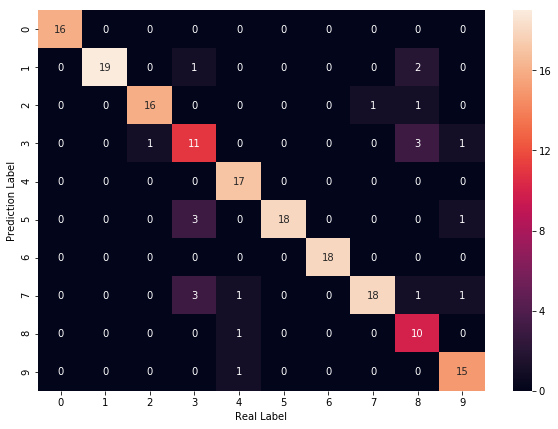

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:67 index:[5] real:5
#1 min_error:76 index:[2 3] real:2
#2 min_error:76 index:[8] real:8
#3 min_error:21 index:[0] real:0
#4 min_error:51 index:[1] real:1
#5 min_error:48 index:[7] real:7
#6 min_error:35 index:[6] real:6
#7 min_error:54 index:[3] real:3
#8 min_error:28 index:[2] real:2
#9 min_error:57 index:[1] real:1
#10 min_error:81 index:[2] real:7
#11 min_error:83 index:[8] real:4
#12 min_error:38 index:[6] real:6
#13 min_error:50 index:[3] real:3
#14 min_error:57 index:[1] real:1
#15 min_error:76 index:[3] real:3
#16 min_error:88 index:[7 9] real:9
#17 min_error:53 index:[1] real:1
#18 min_error:68 index:[7] real:7
#19 min_error:17 index:[6] real:6
#20 min_error:73 index:[8] real:8
#21 min_error:42 index:[4] real:4
#22 min_error:49 index:[3] real:3
#23 min_error:66 index:[1] real:1
#24 min_error:40 index:[4] real:4
#25 min_error:25 index:[0] real:0
#26 min_error:43 index:[5] real:5
#27 min_error:41 index:[3] real:3
#28 min_error:62 index:[6] real:6
#29 min_error:70 ind

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9177489177489178
Avg Base Learner:0.7978206555349413


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

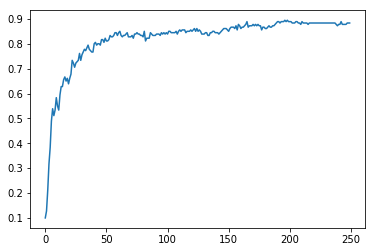

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4656 Total connections::4903
